<a href="https://colab.research.google.com/github/PHYS486-S22/PHYS486-S22/blob/main/SampleNotebooks/Schrodinger/Linear%20Potential%20in%20QM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### a perfect copy of this notebook: https://github.com/mholtrop/QMPython/blob/master/Linear%20Potential%20in%20QM.ipynb

# The Schrödinger Equation with a linear potential

This notebook is based on the Solving the Schrödinger Equation Notebook. 

The setup:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 4096
a = 14

### Linear Potential

#### Symmetric Case

For the symmetric case, we have the potential:
$$
V(x) = \lambda \left| x \right| = \left\{\begin{matrix} \lambda x,& \mathrm{if\ }& x\ge 0 \\ -\lambda x,& \mathrm{if\ }& x<0 \end{matrix}  \right.
$$
For the one-sided case, we have the potential:
$$
V(x) = \left\{\begin{matrix} \lambda x,& \mathrm{if\ }& x\ge 0 \\ \infty,& \mathrm{if\ }& x<0 \end{matrix}  \right.
$$
We set $\lambda = 1$ when we do the calculations. Note that to get the potential to go to $\infty$, we need to set the $x$-axis to go from 0. to $a/2$ with $N/2$ points, instead of from $-a/2$ to $a/2$ with $N$ points.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


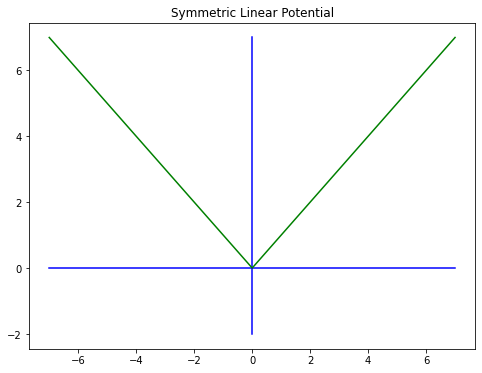

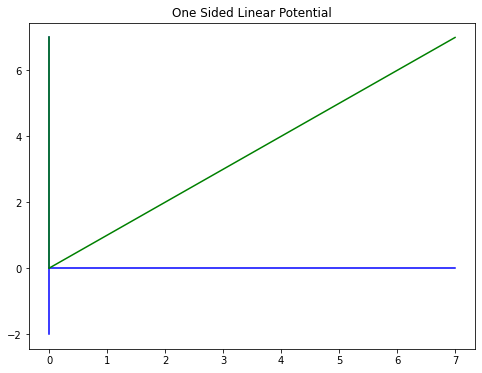

In [7]:
# This is for the symmetric linear potential
xs = np.linspace(-a/2.,a/2.,N)
Vs = np.abs(xs)
# This is for the one-sided linear potential
xo = np.linspace(0.,np.int(a/2),np.int(N/2))
Vo = np.abs(xo)
# Make Plots
fig1 = plt.figure(figsize=(8,6))
# plt.xkcd()    # Set hand drawn looking style
#plt.xticks([]) # And remove x and y ticks.
#plt.yticks([]) # For plotting.
plt.plot([0,0],[-2,a/2.],color="blue")  # Draw the axes in blue.
plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(xs,Vs,color="green")           # Plot the potential in green
plt.title("Symmetric Linear Potential")
plt.savefig("Symmetric_Linear_potential.pdf")
plt.show()
#
# Now plot the one-sided case
#
fig1 = plt.figure(figsize=(8,6))
#plt.xticks([])
#plt.yticks([])
plt.plot([0,0],[-2,a/2.],color="blue")
plt.plot([0,a/2.],[0,0],color="blue")
plt.plot([0,0],[0,a/2.],color="green") # Plot the infinity side. 
plt.plot(xo,Vo,color="green")
plt.title("One Sided Linear Potential")
plt.savefig("Onesided_Linear_potential.pdf")
plt.show()

We can now enter this into the machinery for solving the S.E. For details on how these calculations work, see the Solving the Schrödinger Equation notebook. 

For each of the potentials, we setup the Hamiltonian as a matrix, and then use a matrix solver to get the eigenvalues and eigenstates. The eigenvalues are the energy levels for this system. 

In [9]:
# This is for the Symmetric linear potential case.
hs = xs[1]-xs[0] # Should be equal to 2*np.pi/(N-1)
Mdds = 1./(hs*hs)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
Hs = -(hbar*hbar)/(2.0*m)*Mdds + np.diag(Vs) 
Es,psiTs = np.linalg.eigh(Hs) # This computes the eigen values and eigenvectors
psis = np.transpose(psiTs) 
# We now have the eigen vectors as psi(i), where i is the energy level.
print(np.sum(psis[0]*psis[0]))  # Check. Yes these are normalized already.

1.0


In [11]:
# This is for the One sided case.

ho = xo[1]-xo[0] # Should be equal to 2*np.pi/(N-1)
Mddo = 1./(ho*ho)*(np.diag(np.ones(int(N/2)-1),-1) -2* np.diag(np.ones(int(N/2)),0) + np.diag(np.ones(int(N/2)-1),1))
Ho = -(hbar*hbar)/(2.0*m)*Mddo + np.diag(Vo) 
Eo,psiTo = np.linalg.eigh(Ho) # This computes the eigen values and eigenvectors
psio = np.transpose(psiTo)
# We now have the eigen vectors as psi(i), where i is the energy level.
print(np.sum(psio[0]*psio[0]))  # Check. Yes these are normalized already.
# print psiT[0] # Uncomment to see the values printed for Psi_0

0.9999999999999999


We now print the energy levels. To make it more obvious that the one sided potential energy levels match every other energy level from the symmetric case, I plot the one sided ones next to the corresponding symmetric case one. As you increase the value of $N$, the agreement between these levels gets closer. These results were done with $N=4096$, which gets a bit slow on my system.

In [16]:
print("Symmetric Case  \t One-sided Case")
for n in range(12):
    if n%2==1:
        no = (n-1)/2
        print(no)
        print("Es[{}] = {:9.4f}\t Eo[{}] ={:9.4f}".format(n,Es[n],no, Eo[int(no)]))
    else:
        print("Es[{}] = {:9.4f} ".format(n,Es[n]))



Symmetric Case  	 One-sided Case
Es[0] =    0.8086 
0.0
Es[1] =    1.8558	 Eo[0.0] =   1.8523
Es[2] =    2.5781 
1.0
Es[3] =    3.2446	 Eo[1.0] =   3.2412
Es[4] =    3.8257 
2.0
Es[5] =    4.3817	 Eo[2.0] =   4.3783
Es[6] =    4.8923 
3.0
Es[7] =    5.3895	 Eo[3.0] =   5.3861
Es[8] =    5.8643 
4.0
Es[9] =    6.3487	 Eo[4.0] =   6.3449
Es[10] =    6.8483 
5.0
Es[11] =    7.3945	 Eo[5.0] =   7.3898


We now want to plot these wavefunctions.

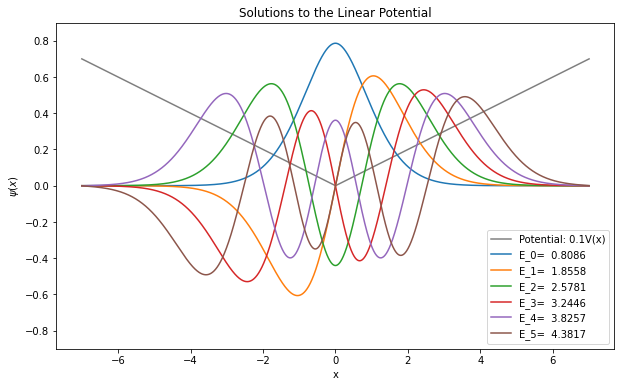

In [17]:
plt.figure(figsize=(10,6))
plt.plot(xs,0.1*Vs,color="grey",label="Potential: 0.1V(x)")
plt.ylim((-0.9,0.9))
for i in range(6):
    if psis[i,N-10]<0:
        plt.plot(xs,-np.real(psis[i])/np.sqrt(hs),label="E_{}={:8.4f}".format(i,Es[i]))
    else:
        plt.plot(xs,np.real(psis[i])/np.sqrt(hs),label="E_{}={:8.4f}".format(i,Es[i]))
    plt.legend()
    plt.title("Solutions to the Linear Potential")
    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
plt.savefig("Linear_Potential_Wavefunctions.pdf")
plt.show()

The first five energy levels for this system are then given by:

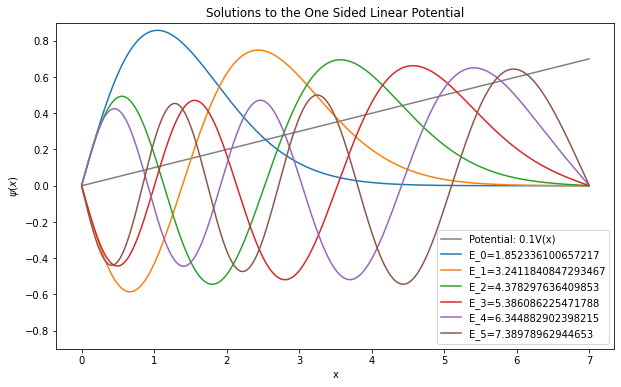

In [19]:
plt.figure(figsize=(10,6))
plt.plot(xo,0.1*Vo,color="grey",label="Potential: 0.1V(x)")
plt.ylim((-0.9,0.9))
for i in range(6):
    if psio[i,int(N/2)-10]<0:
        plt.plot(xo,-psio[i]/np.sqrt(ho),label="E_{}={}".format(i,Eo[i]))
    else:
        plt.plot(xo,psio[i]/np.sqrt(ho),label="E_{}={}".format(i,Eo[i]))
    plt.legend()
    plt.title("Solutions to the One Sided Linear Potential")
    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
plt.savefig("One_Sided_Linear_Potential_Wavefunctions.pdf")
plt.show()

We see that for the wavefunctions as well, every other wavefunction of the symmetric case matches the one from the one-sided case.